In [360]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
import joblib
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [333]:
df = pd.read_csv("data.csv",na_values={
    'bioactivity_class':['intermediate']
})
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,NaN,1300.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,NaN,3100.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,NaN,2500.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,540.0


In [334]:
clean = df.fillna({
    'bioactivity_class':'active',
    'canonical_smiles': 'COc1ccc2nc3cccc(OC)c3nc2c1'
})
clean.dropna()


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,inactive,1300.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,inactive,3100.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,inactive,2500.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,540.0


In [335]:
clean.canonical_smiles[1077]

'COc1ccc2nc3cccc(OC)c3nc2c1'

In [336]:
process_df = clean.drop(['molecule_chembl_id','standard_value'],axis = "columns")


# Creating descriptors
    Molecular Descriptors means the molecular propertise of molecule
        1. Molecules Weight
        2. Molecules Solubility
        3. The number of Hydrogen Bonds a donars
        4. The number of Hyrdrogen Bonds a acceptors
These are the propertise or also known as molecular descriptors. **[Note: There can be more descrpitors]**
## Lipskin Rule of 5 
    There is a rule called lipskin rule of 5
        1. Molecules Weight < 500
        2. Molecules Solubility or logP < 5
        3. Hydrogen Donar bond < 5
        4. Hydrogen Acceptor bond < 10
    If this condition is satisfied the drug might be orally active 
    

## Dividing the outcome class

In [337]:
dummy = pd.get_dummies(process_df['bioactivity_class'],drop_first=True)
dummy

,inactive
0,1
1,1
2,1
3,1
4,1
...,...
1098,1
1099,1
1100,1
1101,0


## For our code **Inactive = 1 & Active = 0**

In [338]:
merge = pd.concat([process_df,dummy],axis="columns")


In [339]:
df_valid = merge.drop('bioactivity_class',axis="columns")
df_valid

,canonical_smiles,inactive
0,COc1ccc2nc3cccc(OC)c3nc2c1,1
1,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,1
2,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,1
3,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,1
4,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,1
...,...,...
1098,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1
1099,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,1
1100,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,1
1101,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,0


In [340]:
x_valid = df_valid.drop('inactive',axis = "columns")
x_valid

,canonical_smiles
0,COc1ccc2nc3cccc(OC)c3nc2c1
1,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...
1098,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...
1099,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...
1100,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...
1101,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...


In [341]:
y_valid = df_valid.drop('canonical_smiles',axis ="columns")
y_valid

,inactive
0,1
1,1
2,1
3,1
4,1
...,...
1098,1
1099,1
1100,1
1101,0


In [342]:

smiles = []
weight = []
for get_can in x_valid.canonical_smiles:
    #Descriptors.MolWt(Chem.MolFromSmiles(get_can))
    smiles.append(get_can)

smiles[1078]

'N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)NCC(N)=O'

In [343]:
# i=0
# while 1:
#     Descriptors.MolWt(Chem.MolFromSmiles(smiles[i]))
#     if i == 1076:
#         break
#     i= i+1

In [344]:
# i=0
# while 1:
#     Descriptors.MolWt(Chem.MolFromSmiles(smiles[i]))
#     if i == 1077:
#         break
#     i= i+1
baseData = np.arange(1,1)
i=0
for smile in smiles:
   #  print(smile)
    mol_wt = Descriptors.MolWt(Chem.MolFromSmiles(smile))
    mol_logP = Descriptors.MolLogP(Chem.MolFromSmiles(smile))
    Num_don = Lipinski.NumHDonors(Chem.MolFromSmiles(smile))
    num_ace = Lipinski.NumHAcceptors(Chem.MolFromSmiles(smile))

    row = np.array([mol_wt,mol_logP,Num_don,num_ace])

    if i==0 :
      baseData=row
    else:
      baseData= np.vstack([baseData,row])
    i=i+1
col_name=  ['MW','logP','Donors','Acceptors']
new_data_des = pd.DataFrame(data=baseData,columns=col_name)
new_data_des

,MW,logP,Donors,Acceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1098,711.741,6.58767,6.0,5.0
1099,656.529,6.71840,4.0,5.0
1100,796.630,7.76857,6.0,6.0
1101,780.631,7.89447,6.0,5.0


## Weight

In [345]:
for i in new_data_des.MW:
    if i<500:
        weight.append(1)
    else:
        weight.append(0)
des_df = pd.DataFrame(data=weight,columns =['MW'])
des_df

,MW
0,1
1,1
2,1
3,1
4,1
...,...
1098,0
1099,0
1100,0
1101,0


## Solubility

In [353]:
solub=[]
for i in new_data_des.logP:
    if i<5:
        solub.append(1)
    else:
        solub.append(0)
des_df['logP']=solub
des_df

,MW,logP
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1098,0,1
1099,0,1
1100,0,1
1101,0,1


## Donars

In [354]:
don=[]
for i in new_data_des.Donors:
    if i<5:
        don.append(1)
    else:
        don.append(0)
des_df['Donor']=don
des_df

,MW,logP,Donor
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
1098,0,1,0
1099,0,1,1
1100,0,1,0
1101,0,1,0


## Acceptors

In [355]:
accep=[]
for i in new_data_des.Acceptors:
    if i<10:
        accep.append(1)
    else:
        accep.append(0)
des_df['Acceptors']=accep
des_df

,MW,logP,Donor,Acceptors
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
1098,0,1,0,1
1099,0,1,1,1
1100,0,1,0,1
1101,0,1,0,1


In [365]:
y_valid

,inactive
0,1
1,1
2,1
3,1
4,1
...,...
1098,1
1099,1
1100,1
1101,0


In [396]:
x_train,x_test,y_train,y_test = train_test_split(des_df,y_valid,test_size=0.3)

In [397]:
len(x_train)

772

In [398]:
des_df

,MW,logP,Donor,Acceptors
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
1098,0,1,0,1
1099,0,1,1,1
1100,0,1,0,1
1101,0,1,0,1


In [399]:
model_rfc  =ensemble.RandomForestClassifier(n_estimators=1000)
model_rfr  =ensemble.RandomForestRegressor(n_estimators=100)
model_ln = linear_model.LinearRegression()
model_lg = linear_model.LogisticRegression()
model_svc = svm.SVC()
model_svr = svm.SVR()


In [400]:
model_rfc.fit(x_train,y_train)
model_rfr.fit(x_train,y_train)
model_ln.fit(x_train,y_train)
model_lg.fit(x_train,y_train)
model_svc.fit(x_train,y_train)
model_svr.fit(x_train,y_train)

<ipython-input-400-536e06e9c072>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(x_train,y_train)
<ipython-input-400-536e06e9c072>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfr.fit(x_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-

SVR()

In [401]:
rfc  = model_rfc.score(x_test,y_test)
rfr  = model_rfr.score(x_test,y_test)
ln = model_ln.score(x_test,y_test)
lg = model_lg.score(x_test,y_test)
svc = model_svc.score(x_test,y_test)
svr = model_svr.score(x_test,y_test)

In [402]:
print("Random forest Classifier: ", rfc)


print("Logistic Regression: ",lg)
print("SVC: ", svc)


Random forest Classifier:  0.9939577039274925
Logistic Regression:  0.9939577039274925
SVC:  0.9939577039274925


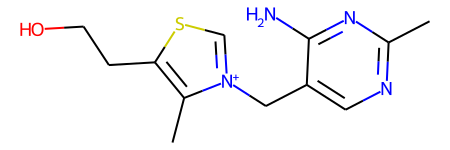

In [348]:
m  = Chem.MolFromSmiles("OCCc1c(C)[n+](cs1)Cc2cnc(C)nc2N")
m

In [349]:
print(m)

In [350]:
m.GetNumAtoms()

18

In [351]:
[atom.GetSymbol() for atom in m.GetAtoms()]

['O',
 'C',
 'C',
 'C',
 'C',
 'C',
 'N',
 'C',
 'S',
 'C',
 'C',
 'C',
 'N',
 'C',
 'C',
 'N',
 'C',
 'N']

In [352]:
Descriptors.MolWt(m)

265.36199999999997